In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.preprocessing import normalize

In [76]:
interactions_df = pd.read_csv("lastfm_user_scrobbles.csv")
titles_df = pd.read_csv("lastfm_artist_list.csv")

In [49]:
titles_df

,artist_id,artist_name
0,1,__Max__
1,2,_Algol_
2,3,-123 Min.
3,4,-Oz-
4,5,-T De Sangre
...,...,...
17488,17489,鷺巣詩郎
17489,17490,黃立行
17490,17491,黄义达
17491,17492,黒木メイサ


In [55]:
interactions_df

,user_id,artist_id,scrobbles
0,1,4562,13883
1,1,10191,11690
2,1,494,11351
3,1,6673,10300
4,1,8402,8983
...,...,...,...
92787,1892,10098,278
92788,1892,8660,263
92789,1892,3274,258
92790,1892,4240,232


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4E522EAC0>,
      dtype=object)

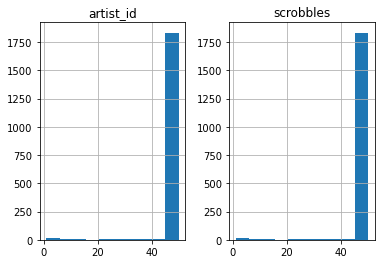

In [56]:
interactions_df.groupby("user_id").count().hist()#.mean()

In [57]:
titles_df.index = titles_df["artist_id"]
title_dict = titles_df["artist_name"].to_dict()

In [58]:
rows, r_pos = np.unique(interactions_df.values[:,0], return_inverse=True)
cols, c_pos = np.unique(interactions_df.values[:,1], return_inverse=True)

In [59]:
artists_sparse = sparse.csr_matrix((interactions_df.values[:,2], (r_pos, c_pos)))

In [60]:
print(artists_sparse)

  (0, 262)	1315
  (0, 493)	11351
  (0, 1621)	2547
  (0, 2561)	2584
  (0, 2605)	2397
  (0, 3237)	1792
  (0, 3271)	3579
  (0, 3512)	1740
  (0, 3559)	6152
  (0, 3827)	1559
  (0, 3991)	2619
  (0, 4126)	2654
  (0, 4546)	1337
  (0, 4561)	13883
  (0, 4784)	2382
  (0, 4949)	3735
  (0, 5205)	3312
  (0, 5336)	1990
  (0, 5435)	1342
  (0, 5854)	2120
  (0, 6035)	4616
  (0, 6067)	1553
  (0, 6187)	1972
  (0, 6672)	10300
  (0, 6853)	2927
  :	:
  (1891, 8659)	263
  (1891, 8660)	443
  (1891, 8726)	731
  (1891, 9074)	655
  (1891, 9428)	1459
  (1891, 10097)	278
  (1891, 10180)	404
  (1891, 10212)	758
  (1891, 10432)	1068
  (1891, 10792)	289
  (1891, 10841)	228
  (1891, 10878)	337
  (1891, 10910)	456
  (1891, 11425)	705
  (1891, 12461)	389
  (1891, 12731)	626
  (1891, 13032)	724
  (1891, 13256)	429
  (1891, 13303)	553
  (1891, 13880)	403
  (1891, 14180)	1062
  (1891, 14816)	793
  (1891, 16053)	457
  (1891, 16191)	535
  (1891, 16639)	1333


In [61]:
Pui = normalize(artists_sparse, norm='l2',axis=1)
sim = Pui.T * Pui

In [64]:
recomend = [title_dict[i+1] for i in sim[301].toarray().argsort()[0][-20:]]
recomendations = list(reversed(recomend))
recomendations

["Patrick O'hearn",
 'Common Rotation',
 'Nine Inch Nails',
 'Flogging Molly',
 'Peter Gabriel',
 'Enya',
 'Disturbed',
 'David Helpling',
 'Eric Serra',
 'Green Day',
 'Ani Difranco',
 'Erik Wøllo',
 '譚盾',
 'R.E.M.',
 'Linkin Park',
 'Vangelis',
 'Duran Duran',
 'Jonathan Coulton',
 'Ennio Morricone',
 'Academy Of St. Martin-In-The-Fields Under Neville Marriner']

In [69]:
artists_sparse_transposed = artists_sparse.transpose(copy=True)
Piu = normalize(artists_sparse_transposed, norm='l2', axis=1)

similarity = Pui * Piu * Pui * Piu * Pui

In [70]:
prev = [title_dict[i+1] for i in np.nonzero(artists_sparse[520])[1].tolist()]

In [71]:
usim = [title_dict[i+1] for i in similarity[520].toarray().argsort()[0][-20:].tolist()]

In [72]:
pred = set(usim) - set(prev)
pred

{'Arctic Monkeys',
 'Britney Spears',
 'Christina Aguilera',
 'Coldplay',
 'Duran Duran',
 'Lady Gaga',
 'Madonna',
 'Muse',
 'Nine Inch Nails',
 'Oasis',
 'Pink Floyd',
 'Radiohead',
 'Rihanna',
 'The Beatles',
 'The Killers'}

In [45]:
interactions_df.loc[len(interactions_df.index)] = [2000, 301, 3000]

In [46]:
interactions_df

,user_id,artist_id,scrobbles
0,1,4562,13883
1,1,10191,11690
2,1,494,11351
3,1,6673,10300
4,1,8402,8983
...,...,...,...
92788,1892,8660,263
92789,1892,3274,258
92790,1892,4240,232
92791,1892,10842,228


In [73]:
points = [(10735, 9), (11894, 8), (301, 6.5), (8785, 2), (9192, 8), (5413, 9)]

In [77]:
def predict(p):
    for i, score in p:
        interactions_df.loc[len(interactions_df.index)] = [2000, i, score*500]
        rows, r_pos = np.unique(interactions_df.values[:,0], return_inverse=True)
        cols, c_pos = np.unique(interactions_df.values[:,1], return_inverse=True)
        artists_sparse = sparse.csr_matrix((interactions_df.values[:,2], (r_pos, c_pos)))
        Pui = normalize(artists_sparse, norm='l2',axis=1)
        artists_sparse_transposed = artists_sparse.transpose(copy=True)
        Piu = normalize(artists_sparse_transposed, norm='l2', axis=1)
        similarity = Pui * Piu * Pui #* Piu * Pui
        prev = [title_dict[i+1] for i in np.nonzero(artists_sparse[520])[1].tolist()]
        usim = [title_dict[i+1] for i in similarity[520].toarray().argsort()[0][-20:].tolist()]
        return set(usim) - set(prev)

In [78]:
predict(points)

{'Duran Duran',
 'Lady Gaga',
 'Muse',
 'Nine Inch Nails',
 'Radiohead',
 'The Beatles'}